# Compare different optimality criteria

In [8]:
import sys
sys.path.append('/Users/jdiedrichsen/Python/MultiTaskBattery/MultiTaskBattery')
import numpy as np 
from numpy.linalg import inv,eig,eigh
import PcmPy as pcm
import matplotlib.pyplot as plt
import MultiTaskBattery.MultiTaskBattery.optimal_battery as ob

In [3]:
N = 8 
U = np.random.normal(0,1,(N,10))
H = pcm.matrix.centering(N)


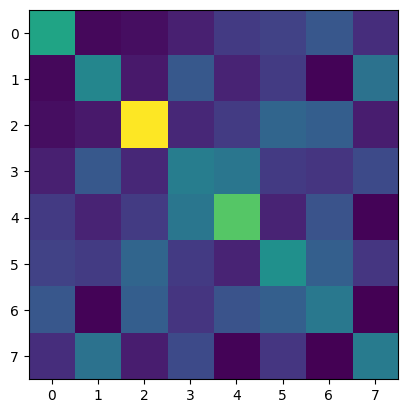

In [5]:
G = U @ U.T
Gc = H @ G @ H
plt.imshow(G)

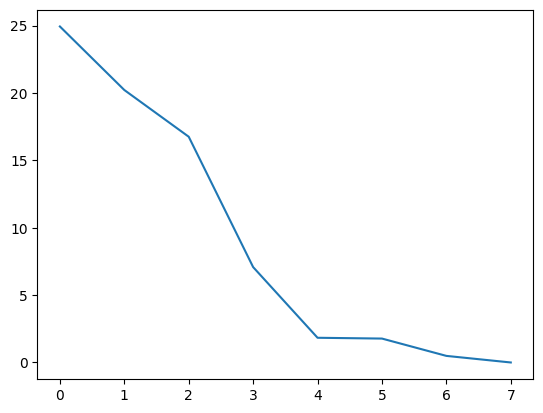

In [6]:
l,V = eigh(Gc)
l = l[::-1]
plt.plot(l)

In [5]:
li,Vi=eigh(inv(Gc))
print(li)
print(1./l)

[-2.00159983e+15 -4.97696780e-01 -1.52081354e-01  7.23538771e-02
  1.53482556e-01  3.99906122e-01  6.39188021e-01  3.47859756e+00]
[4.02040675e-02 6.12669680e-02 9.64167145e-02 1.27501968e-01
 2.13963425e-01 4.15149151e-01 1.61756173e+00 3.66793467e+14]


In [9]:
D=ob.build_combinations(G, strategy='random',n_iter=1000,n_tasks=4)
D

,offset,max_var,min_est,log_det,combination
0,0.000001,25.259681,7.781318e-01,5.369348,"[4, 3, 6, 7]"
1,0.001000,25.262678,7.777622e-01,5.370125,"[4, 3, 6, 7]"
2,0.100000,25.559678,7.430990e-01,5.445377,"[4, 3, 6, 7]"
3,0.000001,28.772080,1.000000e+06,-8.520886,"[0, 4, 5, 0]"
4,0.001000,28.775077,1.000144e+03,-1.612987,"[0, 4, 5, 0]"
...,...,...,...,...,...
2995,0.001000,32.028082,3.866209e-01,6.579440,"[7, 3, 5, 2]"
2996,0.100000,32.325082,3.807288e-01,6.617422,"[7, 3, 5, 2]"
2997,0.000001,22.652672,1.000000e+06,-9.062098,"[5, 0, 0, 7]"
2998,0.001000,22.655669,1.000195e+03,-2.154147,"[5, 0, 0, 7]"


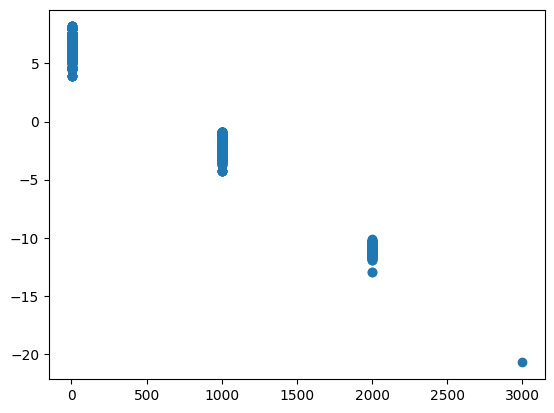

In [10]:
A= D[D.offset==0.001]
plt.scatter(A.min_est,A.log_det)